In [1]:
print("hello world")

hello world


In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(5)

60

In [5]:
f(3)

20

In [7]:
xs = np.arange(-5,5,0.25)

In [8]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [9]:
ys = f(xs)

In [10]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

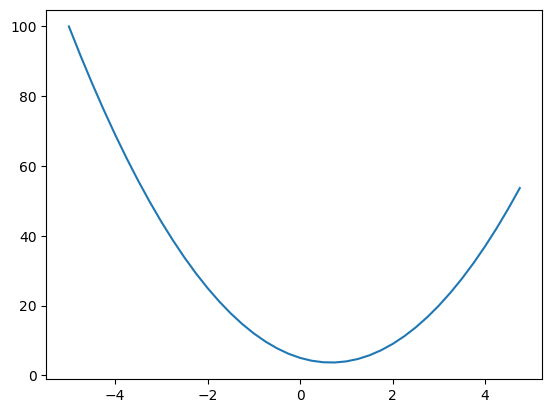

In [11]:
# plotting X's and Y's in graph using matplot
plt.plot(xs,ys)

In [ ]:
# here the graph is a parabola since the function f(X) = 3x^2 - 4x + 5
# Now using the concept of derivative -> response to the small 'h' to a point in the curve

In [16]:
h = 0.00000001 
x = 3.0
f(x)

20.0

In [18]:
f(x + h)

20.00000140000003

In [14]:
f(x + h) - f(x) # response of the function to the change

0.01400300000000243

In [17]:
# using the concept of slope = rise/run
(f(x + h) - f(x))/h # ≈ 14

14.000000305713911

In [20]:
# to get slope = 0
x = 2/3
(f(x + h) - f(x))/h

2.9753977059954195e-07

In [21]:
# Moving on to the more complex case (multiple variable)
a = 2.0
b = -3.0
c = 10
d = a*b + c
print(d)

4.0


In [22]:
#derivative of d w.r.t a,b and c
h = 0.00001
#inputs
a = 2.0
b = -3.0
c = 10
d1 = a*b + c # -> f(x)
# derivative w.r.t a
a += h
d2 = a*b + c # -> f(x+h)

print('d1',d1)
print('d2',d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


In [19]:
# Value class
# Note : Dunder (double underscore) methods like __add__() are called automatically 
# for a + b => it will call a.__add__(b) internally
class Value:
    def __init__(self, data, _children=(), _op='', label = ''): #constructor of the class, and _children = () is an empty tuple, _op is an empty string which tells what operator created that children
        self.data = data
        self.grad = 0.0 # stores gradient of output 'L' with respect to current node
        self._prev = set(_children) # here prev is a 'private' / internal variable which stores the tuple _children
        self._op = _op
        self.label = label
    def __repr__(self): #for string representation of the object
        return f"Value(data={self.data})"
    def __add__(self, other): # overloading '+' operator to add two Value objects
        out = Value(self.data + other.data, (self, other), '+')
        return out  
    def __mul__(self, other): # overloading '*' operator to multiply two Value objects
        out = Value(self.data * other.data, (self, other), '*')
        return out  
a = Value(2.0, label = 'a')
b = Value(4.0, label = 'b')
c = Value(-2, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label= 'd'
# a * b
# d = a*b + c
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'
L

Value(data=-12.0)

In [15]:
L._prev

{Value(data=-2.0), Value(data=6.0)}

In [16]:
L._op

'*'

In [20]:
#For visualizing the expression step by step
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)
    for n in nodes:
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

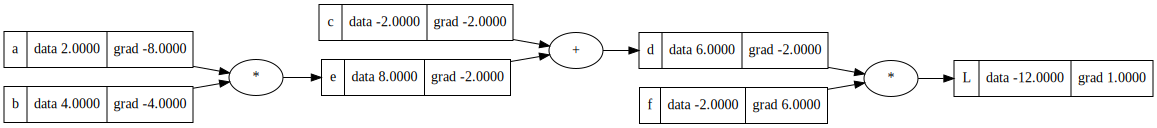

In [41]:
draw_dot(L)

In [ ]:
#here rectangle are the real nodes

In [ ]:
# Moving to the backpropagation part
# Now we will differentiate output node 'L' with respect to each of the other nodes (a,b,e,c,d,f) 
# Consider L as an output of Loss function and other variables as the weight in a neural network

In [ ]:
L = d * f
# dL/dd = ? -> d(d*f)/dd = f (d.grad)
# dL/df = ? -> d(d*f)/df = d (f.grad)
# dL/dc = ? -> using chain rule of differentiation -> (dL/dd) * (dd/dc) = f * (dd/dc) {dL/dd = f} = f * (d(e + c)/dc) = f * ( 0 + 1) = f
# Similarly dL/de = ? -> using chain rule -> dL/de = f
# Similarly dL/da = fb -> -2 * 4 = -8.0
# and dL/db = fa -> -2 * 2 = -4.0
# MANUAL BACKPROPAGATION

In [40]:
# So
f.grad = 6.0 #d
d.grad = -2.0 #f
c.grad = -2.0 #f
e.grad = -2.0 #f
b.grad = -4.0 #fa
a.grad = -8.0 #fb

In [ ]:
L = d * f
# dL/dd = ? -> d(d*f)/dd = f


In [32]:
L.grad = 1.0 #manually setting gradient of L with respect to L as 1

In [39]:
def checkingDerivative():
    #Calculating derivative
    
    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(4.0, label = 'b')
    c = Value(-2, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label= 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a') # adding 'h' to the a just like (x+h)
    b = Value(4.0, label = 'b')
    c = Value(-2, label = 'c')
    c.data += h
    e = a*b; e.label = 'e'
    d = e + c; d.label= 'd'
    f = Value(-2.0, label = 'f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)
    
checkingDerivative()

-1.9999999999953388
